Import package + model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cobra
from cobra.io import (
    read_sbml_model,
    write_sbml_model
)
from cobra.flux_analysis import flux_variability_analysis
from tqdm import tqdm

In [2]:
M_xanthus = read_sbml_model("../M_xanthus_model.sbml") # import the Myxococcus xanthus model
M_xanthus

Name,myxo_model
Memory address,7bb96f780830
Number of metabolites,1280
Number of reactions,1367
Number of genes,1192
Number of groups,0
Objective expression,1.0*OF_BIOMASS - 1.0*OF_BIOMASS_reverse_80d2e
Compartments,"c, e"


In [3]:
E_coli = read_sbml_model("../E_coli_model.sbml")
E_coli

Name,iML1515
Memory address,7bb96e8e8910
Number of metabolites,1877
Number of reactions,2714
Number of genes,1516
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [ ]:
# class Predation:
#     def add_dynamic_bounds(self, model, y, biomass):
#         """Use external concentrations to bound the uptake flux of glucose. \n
#         :param sbml model: The model you want to add dynamic bounds. \n
#         :param list(int) y: A list of the metabolite quantities in environment. In order: glucose, oxygen, amonium.
#         :param int biomass: Quantities of Biomass in the environment.
#         """
#         glucose, oxygen, ammonium = y  # expand the boundary species (Can put more)

#         glucose_max_import = -10 * glucose / (5 + glucose) # calculate the max import value for the metabolites
#         oxygen_max_import = -10 * oxygen / (5 + oxygen)
#         ammonium_max_import = -10 * ammonium / (5 + ammonium)
#         biomass_max_import = -10 * biomass / (5 + biomass)

#         model.reactions.EX_o2_e.lower_bound = oxygen_max_import # change the limit of importation with the max import
#         model.reactions.EX_nh4_e.lower_bound = ammonium_max_import

#         self.prey.reactions.EX_glc__D_e.lower_bound = glucose_max_import

#         self.pred.reactions.EX_glu_L_e.bounds = [0,0]
#         self.pred.reactions.EX_Biomass_e.lower_bound = biomass_max_import


#     def update_metabolites(fluxes, y, biomass):
#         """Updtate the metabolites quantities depending of the fluxes. \n
#         :param list(int) fluxes: The list of the fluxes. \n
#         :param list(int) y: A list of the metabolite quantities in environment. In order: glucose, oxygen, amonium, isoleucine. \n
#         :param int biomass: Quantities of Biomass in the environment.
#         """
#         glucose, oxygen, ammonium = y  # expand the boundary species (Can put more)

#         glucose = glucose + fluxes["EX_glc__D_e"]  # calculate the number of metabolites
#         oxygen = oxygen + fluxes["EX_o2_e"]
#         ammonium = ammonium + fluxes["EX_nh4_e"]
#         if "BIOMASS_Ec_iML1515_core_75p37M" in fluxes:
#             biomass = biomass + fluxes["BIOMASS_Ec_iML1515_core_75p37M"]
#         if "EX_Biomass_e" in fluxes:
#             biomass = biomass + fluxes["EX_Biomass_e"]
        
#         if glucose < 0:
#             glucose = 0 #if the value goes below zero set the number of metaboltie to zero
#         if oxygen < 0:
#             oxygen = 0
#         if ammonium < 0:
#             ammonium = 0
#         if biomass < 0:
#             biomass = 0

#         y = (glucose, oxygen, ammonium)  # changing the value of the metabolites
#         return y, biomass
    

#     def run(self):
#         self.fluxes_prey = []
#         self.fluxes_preda = []
#         self.time_point =[0]
#         it = 0
        
#         with tqdm(total=self.tf) as pbar:
#             while t < self.tf:
#                 self.add_dynamic_bounds(self.prey, y, biomass) ## For Escherichia coli
#                 FBA_1 = self.prey.optimize()  # perform flux balance analysis (FBA)
#                 fluxes_1 = FBA_1.fluxes.get(self.reactions_list_prey)  # store the fluxes of the FBA
#                 fluxes_1 *= 0.1  # multiply by Biomass Concentration to get flux
#                 self.fluxes_prey.append(fluxes_1)  # store all the fluxes
#                 y, biomass = self.update_metabolites(fluxes_1, y, biomass)

#                 self.add_dynamic_bounds(self.preda, y, biomass) ## For Myxococcus xanthus
#                 FBA_2 = M_xanthus.optimize() 
#                 fluxes_2 = FBA_2.fluxes.get(self.reactions_list_preda) 
#                 fluxes_2 *= 0.1 
#                 self.fluxes_preda.append(fluxes_2) 
#                 y, biomass = self.update_metabolites(fluxes_2, y, biomass)

#                 self.time_point.append(self.time_point[it - 1] + self.steps) 
#                 it += 1
#                 t += self.steps
#                 pbar.update(self.steps)
    

#     def plot(self):
#         biomass_E = []
#         biomass_M = []

#         for i in self.fluxes_preda:
#             self.fluxes_preda.append(i["OF_BIOMASS"]) # taking the biomass flux
#         for j in self.fluxes_prey:
#             self.fluxes_prey.append(j['BIOMASS_Ec_iML1515_core_75p37M'])


#         ax = plt.subplot(111)
#         ax.plot(self.time_point[1:], biomass_E, color="cyan", label="Prey") # plot the biomass flux of E_coli
#         ax2 = plt.twinx(ax)
#         ax2.plot(self.time_point[1:], biomass_M, color="magenta", label="Preda")

#         ax.set_ylabel("Biomass", color="cyan") # set the name
#         ax2.set_ylabel("Biomass", color="magenta")
#         ax.set_xlabel('Time')

#         ax.set_title("Fluxes of the biomass from E.coli against M.xanthus") # set the title
#         ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left") # show the legend
#         ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")


#     def __init__(self, prey, pred, metabolite: list, tf: float = 50, dt: float = 0.5) -> None:
#         self.prey = prey 
#         self.pred = pred
#         self.metabolite = metabolite
#         self.tf = tf
#         self.steps = dt
#         self.reactions_list_prey = [] # get all reaction of E_coli model

#         for reaction in self.prey.reactions:
#             self.reactions_list_prey.append(reaction.id)

#         self.reactions_list_preda = []
#         for reaction in self.preda.reactions:
#             self.reactions_list_preda.append(reaction.id)

**Adding Reactions**

In [ ]:
Biomass_e = cobra.Metabolite(
    'Biomass_e',
    formula='BIOMASS',
    name='Biomass [e]',
    compartment='e')

M_xanthus.add_metabolites(Biomass_e) # add M_xanthus.metabolites.Biomass_e

M_xanthus.add_boundary(M_xanthus.metabolites.get_by_id("Biomass_e"), type="exchange") #add the exchange reaction for Biomass_e

Reaction identifier,EX_Biomass_e
Name,Biomass [e] exchange
Memory address,0x7bb96cc2dde0
Stoichiometry,Biomass_e <=> Biomass [e] <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
Mreaction = cobra.Reaction('PR_BIOMASS')
Mreaction.name = 'Predation Biomass'
Mreaction.subsystem = ''
Mreaction.lower_bound = 0.  # This is the default
Mreaction.upper_bound = 1000.  # This is the default

Biomass_e = M_xanthus.metabolites.Biomass_e

spmd_e = M_xanthus.metabolites.spmd_e # carbon source from exchange used in biomass reaction
pheme_e = M_xanthus.metabolites.pheme_e
val_L_e = M_xanthus.metabolites.val_L_e # imported AA
ile_L_e = M_xanthus.metabolites.ile_L_e
leu_L_e = M_xanthus.metabolites.leu_L_e
lys_L_e = M_xanthus.metabolites.lys_L_e
his_L_e = M_xanthus.metabolites.his_L_e
gly_cys_L_e = M_xanthus.metabolites.gly_cys_L_e
pro_L_e = M_xanthus.metabolites.pro_L_e
alaala_e = M_xanthus.metabolites.alaala_e
fru_e = M_xanthus.metabolites.fru_e
glu_L_e = M_xanthus.metabolites.glu_L_e # don't know if necessary

Mreaction.add_metabolites({
    Biomass_e: -1,
    spmd_e: 1,
    pheme_e: 1,
    val_L_e: 1,
    ile_L_e: 1,
    leu_L_e: 1,
    lys_L_e: 1,
    his_L_e: 1,
    gly_cys_L_e: 1,
    pro_L_e: 1,
    alaala_e: 1,
    fru_e: 1,
    glu_L_e: 1
}) # add the metabolites to the reaction

Mreaction.gene_reaction_rule = '' # define which gene allow the reaction 

M_xanthus.add_reactions([Mreaction]) # add the PR_Biomass reaction

M_xanthus.reactions.PR_BIOMASS

Reaction identifier,PR_BIOMASS
Name,Predation Biomass
Memory address,0x7bb96cc2e200
Stoichiometry,Biomass_e --> alaala_e + fru_e + glu_L_e + gly_cys_L_e + his_L_e + ile_L_e + leu_L_e + lys_L_e + pheme_e + pro_L_e + spmd_e + val_L_e Biomass [e] --> Ala-Ala [e] + D-Fructose [e] + L-Glutamate [e] + Gly-Cys [e] + L-Histidine [e] + L-Isoleucine [e] + L-Leucine [e] + L-Lysine [e] + Heme [e] + L-Proline [e] + Spermidine [e] +...
GPR,
Lower bound,0.0
Upper bound,1000.0


Change value

In [ ]:
M_xanthus.reactions.EX_spmd_e.lower_bound = 0 # define the bound to 0 for metabolites in the reactions
M_xanthus.reactions.EX_pheme_e.lower_bound = 0
M_xanthus.reactions.EX_val_L_e.lower_bound = 0
M_xanthus.reactions.EX_ile_L_e.lower_bound = 0
M_xanthus.reactions.EX_leu_L_e.lower_bound = 0
M_xanthus.reactions.EX_lys_L_e.lower_bound = 0
M_xanthus.reactions.EX_gly_cys_L_e.lower_bound = 0
M_xanthus.reactions.EX_pro_L_e.lower_bound = 0
M_xanthus.reactions.EX_alaala_e.lower_bound = 0
M_xanthus.reactions.EX_fru_e.lower_bound = 0
M_xanthus.reactions.EX_glu_L_e. lower_bound = 0

In [ ]:
M_xanthus.reactions.EX_glc_D_e.id = 'EX_glc__D_e' # change the name to correspond to E_coli

**Dynamic environment**

In [ ]:
t = 0
tf = 50
steps = 0.5 
time_point = [0]
it = 1
y = [100, 100, 100] # give the number of metabolites in the environment
biomass = 0 # quantities of Biomass in the environment
fluxes_E = []
fluxes_M = []

reactions_list_E_coli = [] # get all reaction of E_coli model
for reaction in E_coli.reactions:
    reactions_list_E_coli.append(reaction.id)

reactions_list_M_xanthus = []
for reaction in M_xanthus.reactions:
    reactions_list_M_xanthus.append(reaction.id)


def add_dynamic_bounds(model, y, biomass):
    """Use external concentrations to change the bound changing the uptake flux of the limited metabolites. \n
    :param sbml model: The model you want to add dynamic bounds. \n
    :param list(int) y: A list of the metabolite quantities in environment. In order: glucose, oxygen, amonium. \n
    :param int biomass: Quantities of Biomass in the environment.
    """
    glucose, oxygen, ammonium = y  # expand the boundary species (Can put more)

    glucose_max_import = -10 * glucose / (5 + glucose) # calculate the max import value for the metabolites
    oxygen_max_import = -10 * oxygen / (5 + oxygen)
    ammonium_max_import = -10 * ammonium / (5 + ammonium)
    biomass_max_import = -10 * biomass / (5 + biomass)

    model.reactions.EX_o2_e.lower_bound = oxygen_max_import
    model.reactions.EX_nh4_e.lower_bound = ammonium_max_import

    E_coli.reactions.EX_glc__D_e.lower_bound = glucose_max_import  # change the limit of importation with the max import

    M_xanthus.reactions.EX_glc__D_e.bounds = [0,0]
    M_xanthus.reactions.EX_Biomass_e.lower_bound = biomass_max_import


def update_metabolites(fluxes, y, biomass):
    """Updtate the metabolites quantities depending of the fluxes. \n
    :param list(int) fluxes: The list of the fluxes. \n
    :param list(int) y: A list of the metabolite quantities in environment. In order: glucose, oxygen, amonium, isoleucine. \n
    :param int biomass: Quantities of Biomass in the environment.
    """
    glucose, oxygen, ammonium = y  # expand the boundary species (Can put more)

    glucose = glucose + fluxes["EX_glc__D_e"]  # calculate the number of metabolites
    oxygen = oxygen + fluxes["EX_o2_e"]
    ammonium = ammonium + fluxes["EX_nh4_e"]
    if "BIOMASS_Ec_iML1515_core_75p37M" in fluxes:
        biomass = biomass + fluxes["BIOMASS_Ec_iML1515_core_75p37M"]
    if "EX_Biomass_e" in fluxes:
        biomass = biomass + fluxes["EX_Biomass_e"]
    
    if glucose < 0:
        glucose = 0 #if the value goes below zero set the number of metaboltie to zero
    if oxygen < 0:
        oxygen = 0
    if ammonium < 0:
        ammonium = 0
    if biomass < 0:
        biomass = 0

    y = (glucose, oxygen, ammonium)  # changing the value of the metabolites
    return y, biomass


with tqdm(total=tf) as pbar:
    while t < tf:
        add_dynamic_bounds(E_coli, y, biomass) ## For Escherichia coli
        FBA_1 = E_coli.optimize()  # perform flux balance analysis (FBA)
        fluxes_E_coli = FBA_1.fluxes.get(reactions_list_E_coli)  # store the fluxes of the FBA
        fluxes_E_coli *= 0.1  # multiply by Biomass Concentration to get flux
        fluxes_E.append(fluxes_E_coli)  # store all the fluxes
        y, biomass = update_metabolites(fluxes_E_coli, y, biomass)

        add_dynamic_bounds(M_xanthus, y, biomass) ## For Myxococcus xanthus
        FBA_2 = M_xanthus.optimize() 
        fluxes_M_xanthus = FBA_2.fluxes.get(reactions_list_M_xanthus) 
        fluxes_M_xanthus *= 0.1 
        fluxes_M.append(fluxes_M_xanthus) 
        y, biomass = update_metabolites(fluxes_M_xanthus, y, biomass)

        time_point.append(time_point[it - 1] + steps) 
        it += 1
        t += steps
        pbar.update(steps)

100%|██████████| 50.0/50 [00:15<00:00,  3.18it/s]


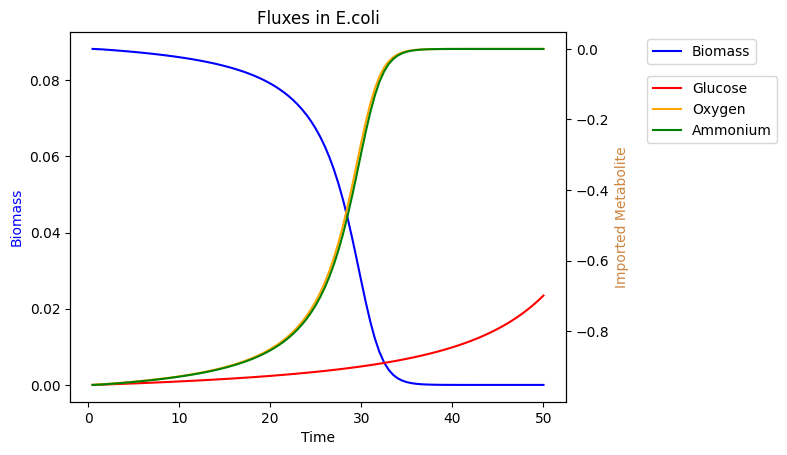

In [10]:
glucose = []
oxygen = []
ammonium = []
biomass = []

for i in fluxes_E:
    glucose.append(i["EX_glc__D_e"])
    biomass.append(i["BIOMASS_Ec_iML1515_core_75p37M"])
    oxygen.append(i["EX_o2_e"])
    ammonium.append(i["EX_nh4_e"])

ax = plt.subplot(111)
ax.plot(time_point[1:], biomass, color="blue", label="Biomass")
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], glucose, color="red", label="Glucose")
ax2.plot(time_point[1:], oxygen, color="orange", label="Oxygen")
ax2.plot(time_point[1:], ammonium, color="green", label="Ammonium")
ax.set_ylabel("Biomass", color="blue")
ax2.set_ylabel("Imported Metabolite", color="peru")
ax.set_xlabel('Time')

ax.set_title("Fluxes in E.coli")
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left")
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")

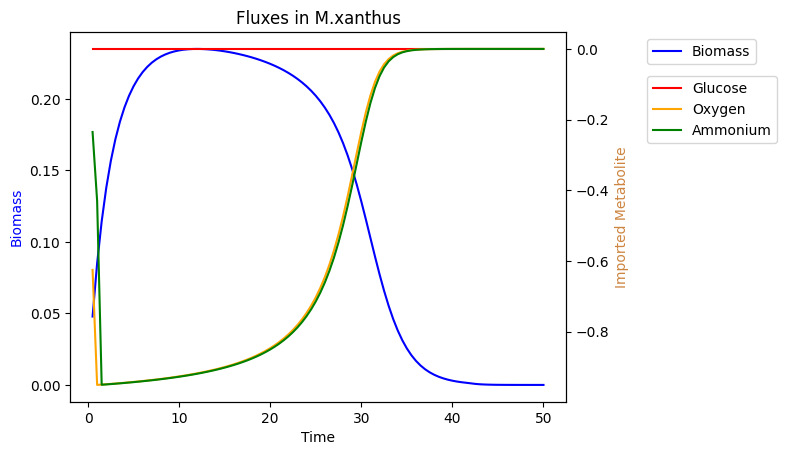

In [11]:
glucose = []
oxygen = []
ammonium = []
biomass = []

for i in fluxes_M:
    glucose.append(i["EX_glc__D_e"])
    biomass.append(i["OF_BIOMASS"])
    oxygen.append(i["EX_o2_e"])
    ammonium.append(i["EX_nh4_e"])

ax = plt.subplot(111)
ax.plot(time_point[1:], biomass, color="blue", label="Biomass")
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], glucose, color="red", label="Glucose")
ax2.plot(time_point[1:], oxygen, color="orange", label="Oxygen")
ax2.plot(time_point[1:], ammonium, color="green", label="Ammonium")

ax.set_ylabel("Biomass", color="blue")
ax2.set_ylabel("Imported Metabolite", color="peru")
ax.set_xlabel('Time')

ax.set_title("Fluxes in M.xanthus")
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left")
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")

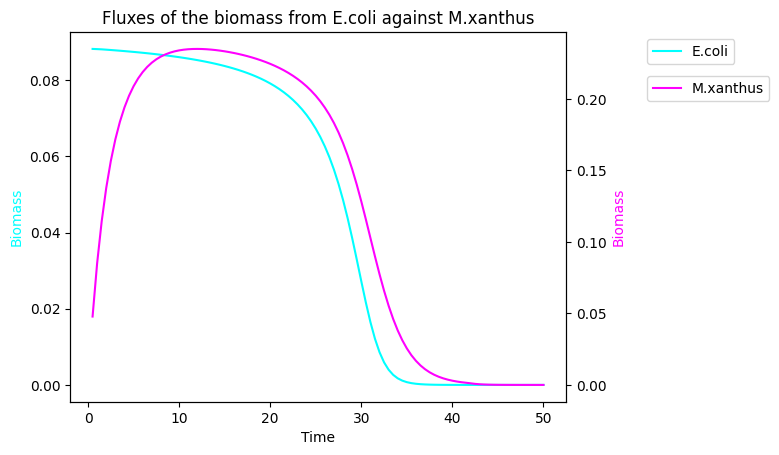

In [ ]:
biomass_E = []
biomass_M = []

for i in fluxes_M:
    biomass_M.append(i["OF_BIOMASS"]) # taking the biomass flux
for j in fluxes_E:
    biomass_E.append(j['BIOMASS_Ec_iML1515_core_75p37M'])


ax = plt.subplot(111)
ax.plot(time_point[1:], biomass_E, color="cyan", label="E.coli") # plot the biomass flux of E_coli
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], biomass_M, color="magenta", label="M.xanthus")

ax.set_ylabel("Biomass", color="cyan") # set the name
ax2.set_ylabel("Biomass", color="magenta")
ax.set_xlabel('Time')

ax.set_title("Fluxes of the biomass from E.coli against M.xanthus") # set the title
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left") # show the legend
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")

In [13]:
M_xanthus.summary(FBA_2)

Metabolite,Reaction,Flux,C-Number,C-Flux
Biomass_e,EX_Biomass_e,0.0001243,0,0.00%
acac_e,EX_acac_e,0.0001109,4,12.86%
cgly_e,EX_cgly_e,0.0001081,5,15.67%
for_e,EX_for_e,2.134E-06,1,0.06%
fum_e,EX_fum_e,0.0002349,4,27.24%
gam_e,EX_gam_e,1.065E-05,6,1.85%
glyc3p_e,EX_glyc3p_e,0.0004828,3,42.00%
orn_e,EX_orn_e,2.152E-06,5,0.31%
tsul_e,EX_tsul_e,0.0001807,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
